In [1]:
# uncomment this line if you want to use interactive plot (only works in Jupyter but not in VScode)
# %matplotlib ipympl

import time
from pathlib import Path
from operator import itemgetter

import scanpy as sc
import numpy as np
import pandas as pd
from joblib import Parallel, delayed

import os
print(os.getcwd())#显示当前路径
os.chdir('D:/bio/SLAT/SLAT-main')#更改路径，''里面为更改的路径
print(os.getcwd())#显示当前路径
import scSLAT
from scSLAT.model import run_SLAT_multi
from scSLAT.viz import build_3D

D:\bio\jupyter_code\STARmap
D:\bio\SLAT\SLAT-main


In [2]:
sc.set_figure_params(dpi=100, dpi_save=150)

In [3]:
sample_names = ["BZ5","BZ9","BZ14"]
input_dir = 'G:/dataset/STARmap/input/'
output_dir = 'G:/dataset/STARmap/output/SLAT/'
experiment_name = 'STARmap'

In [4]:
import anndata as ad
adata_list = []

for dataset in sample_names:
    # adata = sc.read_visium(input_dir + dataset)
    # adata.var_names_make_unique()
    # adata.obs_names_make_unique()
    
    adata = sc.read_h5ad(input_dir+dataset+'/'+dataset+'.h5ad')
    df = adata.obs[['x','y']]
    adata.obsm['spatial'] = df.values
    
    adata.obs['annotation'] = adata.obs['ClusterName']
    adata = adata[~pd.isna(adata.obs['x'])]
    adata_list.append(adata)

In [5]:
# def load_sample(file):
#     adata = sc.read_visium(file)
#     adata.var_names_make_unique()
#     adata.obs_names_make_unique()
#     adata_label = pd.read_csv(file + '/truth.csv', index_col=0)
#     adata.obs['batch'] = adata_label['batch']
#     adata.obs['annotation'] = adata_label['ground.truth']
#     # adata = sc.read_h5ad(file)
#     # # subsample 8000 cells
#     # adata = sc.pp.subsample(adata, n_obs=8000, random_state=0, copy=True)
#     return adata

# adata1,adata2,adata3,adata4 = Parallel(n_jobs=len(file_list)+1)\
#     (delayed(load_sample)(file) for file in itemgetter(*[2,3,1,0])(file_list))

# print(adata1)
# print(adata2)
# print(adata3)
# print(adata4)

# sc.pl.spatial(adata1, img_key="hires", color='annotation')
# sc.pl.spatial(adata2, img_key="hires", color='annotation')
# sc.pl.spatial(adata3, img_key="hires", color='annotation')
# sc.pl.spatial(adata4, img_key="hires", color='annotation')

D:\anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
D:\anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
D:\anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
D:\anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


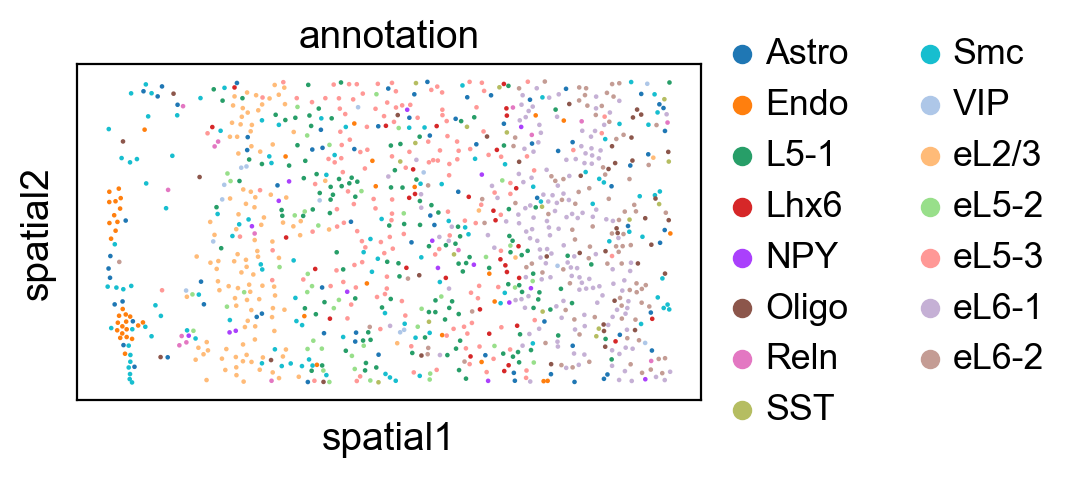

D:\anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
D:\anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
D:\anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
D:\anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
D:\anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


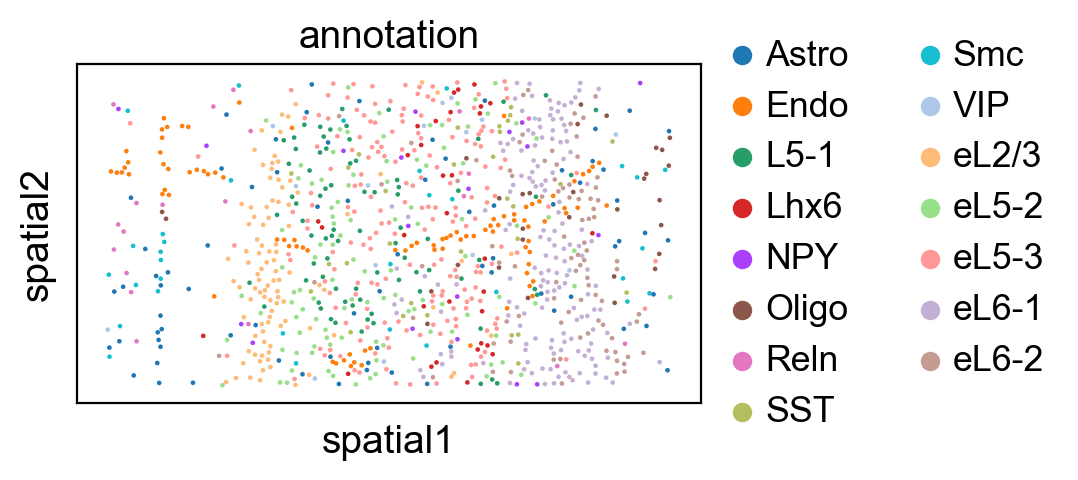

D:\anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
D:\anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
D:\anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
D:\anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
D:\anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


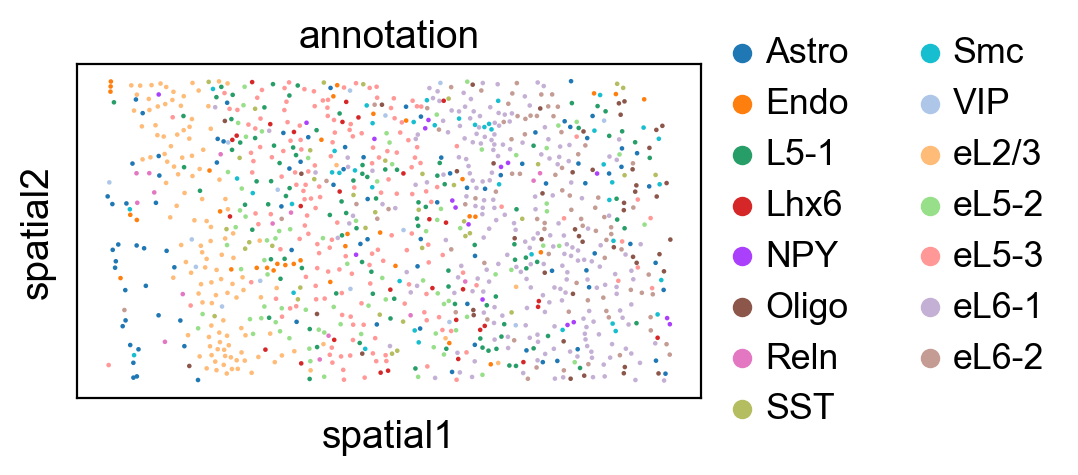

In [6]:
for adata in adata_list:
    sc.pl.spatial(adata, img_key="hires", color='annotation', spot_size = 100)

In [7]:
start = time.time()
matching_list, zip_res = run_SLAT_multi(adata_list, k_cutoff=5, n_jobs = 1)
print(f'Use {time.time()-start:.2f} seconds')

Calculating spatial neighbor graph ...
The graph contains 6027 edges, 1049 cells.
5.7454718779790275 neighbors per cell on average.
Calculating spatial neighbor graph ...
The graph contains 6059 edges, 1053 cells.
5.75403608736942 neighbors per cell on average.
Calculating spatial neighbor graph ...
The graph contains 6190 edges, 1088 cells.
5.689338235294118 neighbors per cell on average.
Parallel mapping dataset:0 --- dataset:1
Use DPCA feature to format graph


D:\anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
D:\anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
D:\anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
D:\anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Warning! Dual PCA is using GPU, which may lead to OUT OF GPU MEMORY in big dataset!
Choose GPU:0 as device
Running
---------- epochs: 1 ----------
---------- epochs: 2 ----------
---------- epochs: 3 ----------
---------- epochs: 4 ----------
---------- epochs: 5 ----------
---------- epochs: 6 ----------
Training model time: 2.13
Parallel mapping dataset:1 --- dataset:2
Use DPCA feature to format graph
Warning! Dual PCA is using GPU, which may lead to OUT OF GPU MEMORY in big dataset!


D:\anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
D:\anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
D:\anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
D:\anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Choose GPU:0 as device
Running
---------- epochs: 1 ----------
---------- epochs: 2 ----------
---------- epochs: 3 ----------
---------- epochs: 4 ----------
---------- epochs: 5 ----------
---------- epochs: 6 ----------
Training model time: 0.87
Use 6.09 seconds


In [8]:
# print(matching_list)
# print(zip_res)
# print(adata1)
# print(adata2)
# print(adata3)
# print(adata4)

In [9]:
# index_list = [i[1] for i in zip_res] 
# print(index_list)
# print(index_list[2].shape)

In [10]:
# shape_list = []
# for j, mapping in enumerate(matching_list):
#     print(mapping.shape[1])
#     shape_list.append(mapping.shape[1])

# print(shape_list)

In [16]:
matching_list[0].shape[1]

2

Mapping 0th layer 


ValueError: Cannot take a larger sample than population when 'replace=False'

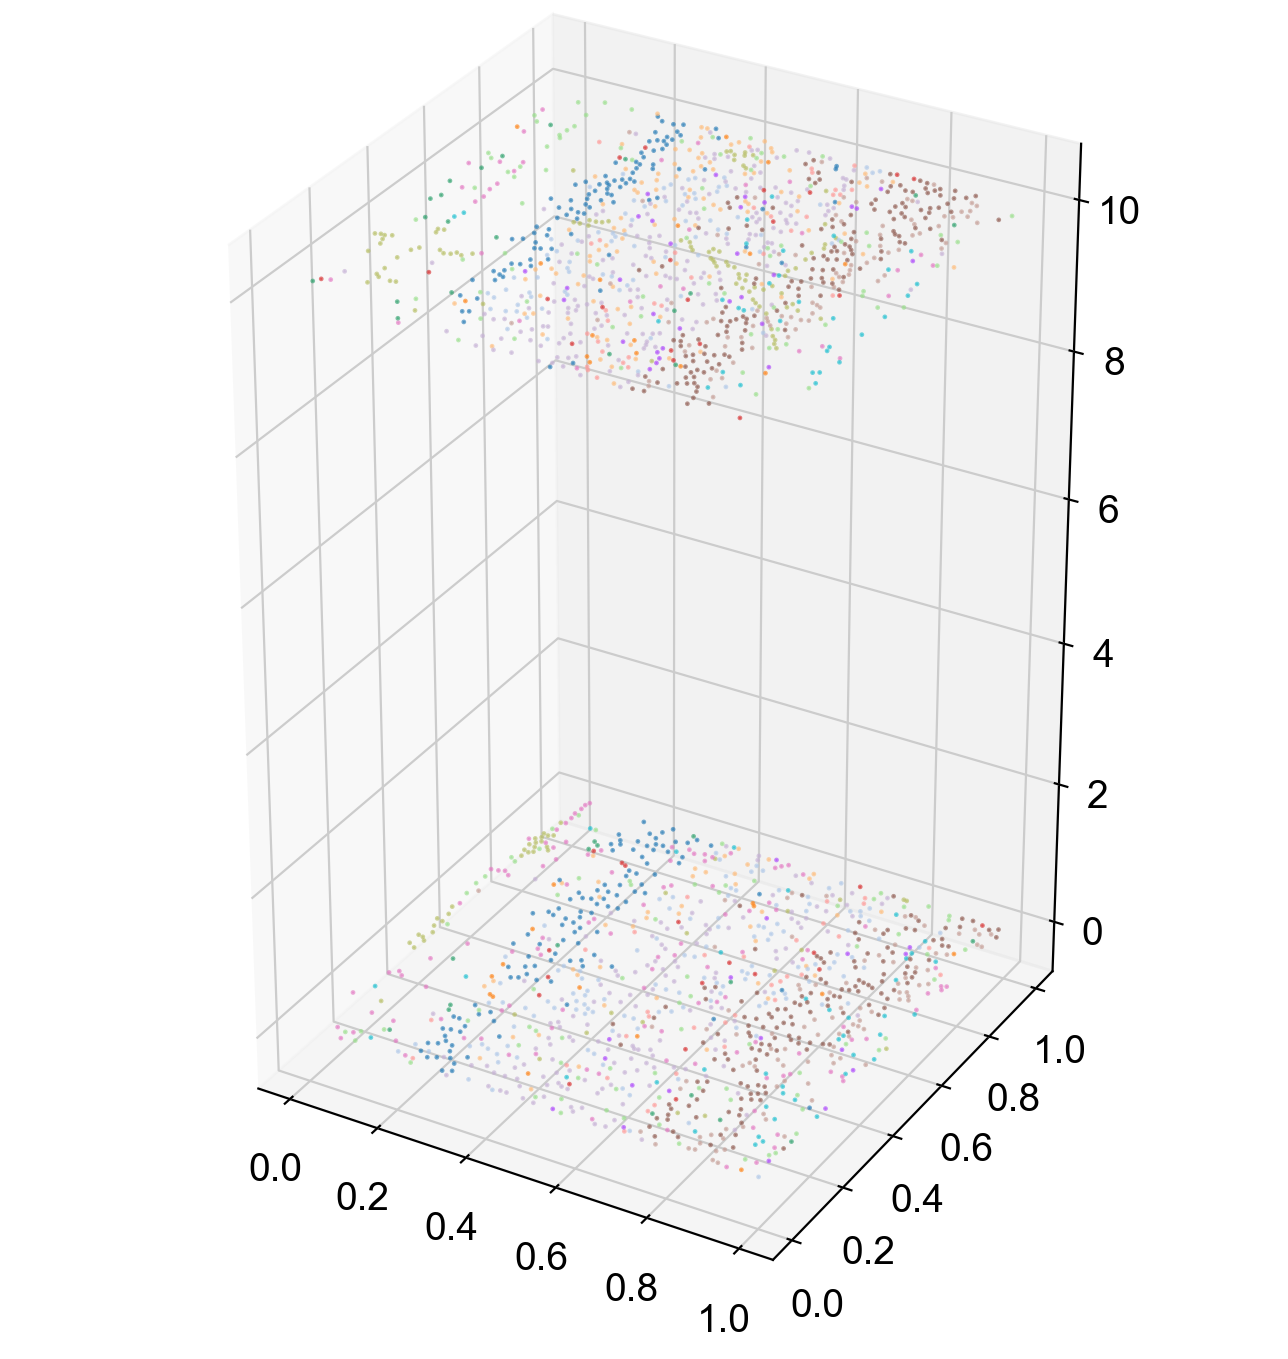

In [21]:
# model = build_3D(adata_list, matching_list, subsample_size = min(shape_list), scale_coordinate = False)
# model.draw_3D(hide_axis=True, line_color='red', height=10, size=[8,20], line_width=1)
model = build_3D(adata_list, matching_list)
model.draw_3D(hide_axis=True, line_color='red', height=10, size=[8,20], line_width=1)

In [19]:
for adata in adata_list:
    adata_df = pd.DataFrame({'index': range(adata.shape[0]),
                        'x': adata.obsm['spatial'][:,0],
                        'y': adata.obsm['spatial'][:,1],
                        'celltype': adata.obs['annotation']})
    adata_df.to_csv(output_dir + 'SLAT_' + experiment_name + '_' + adata.obs['batch'][0] + '.csv')